***edge*** of a tree *T* is a pair of nodes (u,v) such that *u* is the parent of *v*, or vice versa.  
A ***path*** of *T* is a sequence of nodes such that any two consecutive nodes in the sequence form an edge.

A node v is **external** if v has no children. A node v is **internal** if it has one or more children

The **depth** of p is the number of ancestors of p, excluding p itself.

**height**:
* if p is a leaf, height = 0
* 1 + max height among children's height

In [0]:
class Tree:
  class Position:
    def element(self):
      raise NotImplementedError('must be implemented by subclass')

    def __eq__(self,other):
      raise NotImplementedError('must be implemented by subclass')
    
    def __ne__(self,other):
      return not(self==other)

  def root(self):
    raise NotImplementedError('must be implemented by subclass')

  def parent(self,p):
    raise NotImplementedError('must be implemented by subclass')

  def num_children(self,p):
    raise NotImplementedError('must be implemented by subclass')

  def children(self,p):
    raise NotImplementedError('must be implemented by subclass')

  def __len__(self):
    raise NotImplementedError('must be implemented by subclass')

  def is_root(self,p):
    return self.root() == p

  def is_leaf(self,p):
    return self.num_children(p) == 0

  def is_empty(self):
    return len(self) == 0

"""O(n)"""
  def depth(self,p): #number of ancestor
    if self.is_root(p):
      return 0
    else:
      return 1 + self.depth(self.parent(p))

  def height(self,p):
    """
    . if p is a leaf, height = 0
    . 1 + max height among children's height

    """
    if p is None:
      p = self.root()
    if self.is_leaf(p):
      return 0
    else:
      return 1 + max(self.height(c) for c in self.children(p))



A binary tree is an ordered tree with the following properties:
1. Every node has at most two children.
2. Each child node is labeled as being either a left child or a right child.
3. A left child precedes a right child in the order of children of a node.

A binary tree is **proper** if each node has either
zero or two children. Some people also refer to such trees as being **full** binary trees. Thus, in a proper binary tree, every internal node has exactly two children. A binary tree that is not proper is **improper**.

In [0]:
class BinaryTree(Tree):
  def left(self,p):
    raise NotImplementedError('must be implemented by subclass')
  
  def right(self,p):
    raise NotImplementedError('must be implemented by subclass')
  
  def sibling(self,p):
    parent = self.parent(p)
    if parent is None:
      return None
    else:
      if p == self.left(parent):
        return self.right(parent)
      else:
        return self.left(parent)

  def children(self,p):
    if self.left(p) is not None:
      yield self.left(p)
    if self.right(p) is not None:
      yield self.right(p)

  

In [0]:
class LinkedBinaryTree(BinaryTree):
  class _Node:
    __slots__ = '_element','_parent','_left','_right'
    def __init__(delf,element,parent=None,left=None,right=None):
      self._element = element
      self._parent = parent
      self._left = left
      self._right = right

  class Position(BinaryTree.Position): 
    #postion sẽ giúp lưu vị trí truy xuất hiện tại
    def __init__(self, container, node):
      self._container = container
      self._node = node

    def element(self):
      return self._node._element

    def __eq__(self,other):
      return type(other) is type(self) and other._node is self._node

  def _validate(self,p):
    if not isinstance(p,self.Position):
      raise TypeError('p must be proper Position type')
    if p._container is not self:
      raise ValueError('p is not belong to this container')
    return p._node

  def _make_position(self,node):
    return self.Position(self,node) if node is not None else  None

  def __init__(self):
    self._root = None
    self._size = 0

  def __len__(self):
    return self._size

  def root(self):
    return self._make_position(self._root)

  def parent(self,p):
    node = self._validate(p)
    return self._make_position(node._parent)

  def left(self,p):
    node = self._validate(p)
    return self._make_position(node._left)

  def right(self,p):
    node = self._validate(p)
    return self._make_position(node._right)

  def num_children(self,p):
    node = self._validate(p)
    count = 0
    node = self._validate(p)
    if node._left is not None:
      count+=1
    if node._right is not None:
      count+=1
    return count

  def _add_root(self,e):
    if self._root is not None:
      raise ValueError('Root exists')
    self._size = 1
    self._root = self.Node(e)
    return self._make_position(self._root)

  def _add_left(self,p,e):
    node = self._validate(p)
    if node._left is not None:
      raise ValueError('Left child exists')
    self._size+=1
    node._left = self._Node(e,node)
    return self._make_position(self,node._left)

  def _add_right(self,p,e):
    node = self._validate(p)
    if node._right is not None:
      raise ValueError('Node does not exist')
    self._size+=1
    node._right = self._Node(e,node)
    return self._make_position(self,node._left)

  def _replace(self,p,e):
    node = self._validate(p)
    old = node._element
    node._element = e
    return old

  def delete(self,p):
    node = self._validate(p)
    if self.num_children(p)==2: raise ValueError('p has two children')
    child = node._left if node._left else node._right
    if child is not None:
      child._parent = node._parent
    if node is self._root:
      self.root = child
    else:
      parent = node._parent
      if node is parent._left:
        parent._left = child
      else:
        parent._right = child
    self._size -= 1
    node._parent = node #convention for deprecated node
    return node._element

  def _attach(self,p,t1,t2):
    node = self._validate(p)
    if not self.is_leaf(p): raise ValueError('position must be leaf')
    if not type(self) is type(t1) is type(t2):
      raise TypeError('Tree must be match')
    self._size += len(t1) + len(t2)
    if not t1.is_empty():
      t1._root._parent = node
      node._left = t1._root
      t1._root = None #set t1 instance to empty
      t1._size = 0
    if not t2.is_empty():
      t2._root._parent = node
      node._right = t2._root
      t2._root = None
      t2._size = 0

  def positions(self):
    return self.preorder()

  def __iter__(self):
    for p in self.positions():
      yield p.element()
  
  def preorder(self):
    if not self.is_empty():
      for p in self._subtree_preorder(self.root()):
        yield p

  def _subtree_preorder(self,p):
    yield p
    for c in self.children(p):
      for other in self._subtree_preorder(c):
        yield other

  def postorder(self):
    if not self.is_empty():
      for p in self._subtree_postorder(self.root()):
        yield p

  def _subtree_postorder(self,p):
    for c in self.children(p):
      for other in self._subtree_postorder(c):
        yield other
    yield p

  def inorder(self):
    if not self.is_empty():
      for p in self._subtree_inorder(self.root()):
        yield p

  def _inorder_subtree(self,p):
    if self.left(p) is not None:
      for other in self._inorder_subtree(self.left(p)):
        yield other
    yield p
    for self.right(p) is not None:
      for other in self._inorder_subtree(self.right(p)):
        yield other

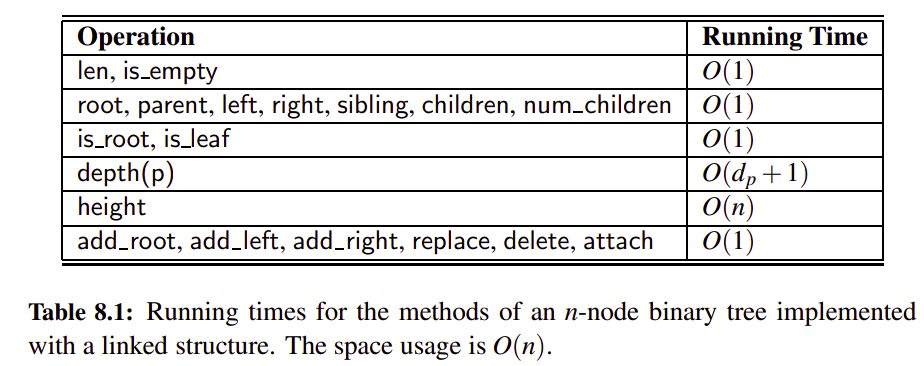

#Tree traversal
In a **preorder traversal** of a tree T, the root of T is visited first and then the subtrees rooted at its children are traversed recursively.

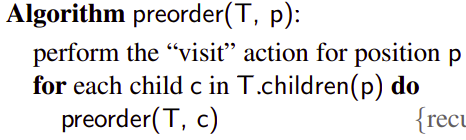

**Postorder traversal** recursively traverses the subtrees rooted at the children of the root first, and then visits the root  
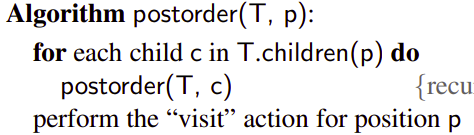  
At each position p, the nonrecursive part of the traversal algorithm requires time $O(c_p +1)$,
where cp is the number of children of p, under the assumption that the “visit” itself takes $O(1)$ time. By Proposition 8.5, the overall running time for the traversal of tree T is $O(n)$, where $n$ is the number of positions in the tree. This running time is asymptotically optimal since the traversal must visit all the $n$ positions of the tree.

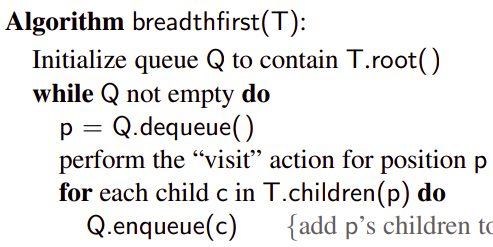

#Binary tree traversal
Inorder traversal  
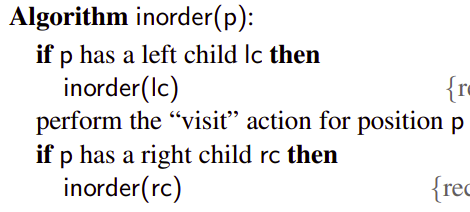

#Implementing Tree Traversals

above in BinaryLinkedTree

#Balance search tree

## Performance of a Binary Search Tree

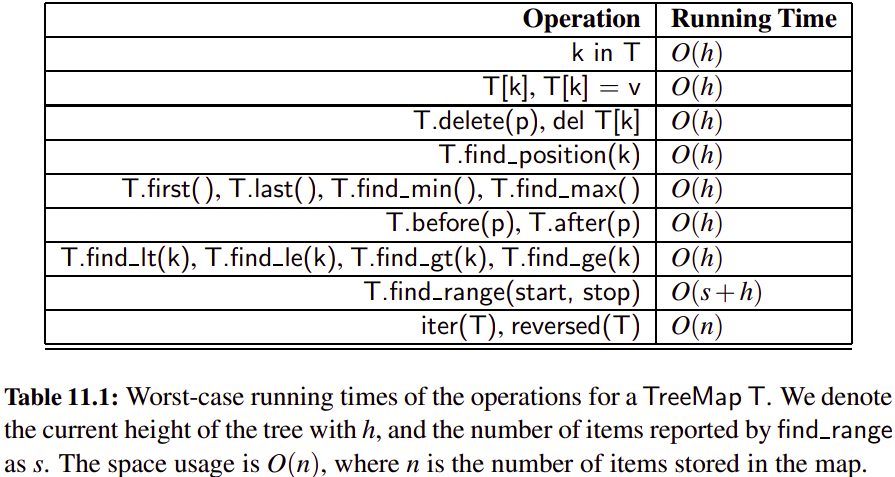

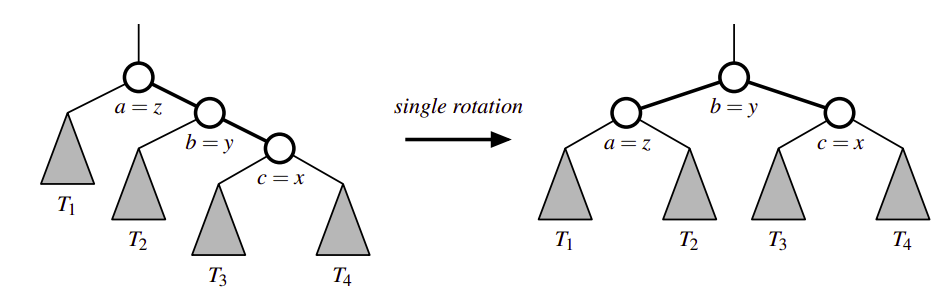

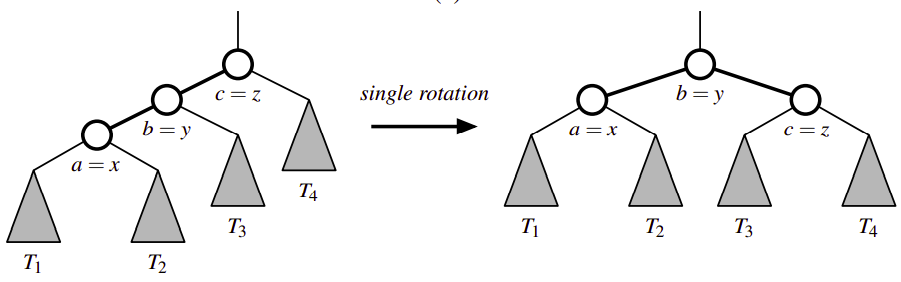

Cân bằng cây bị lệch từ dưới lên

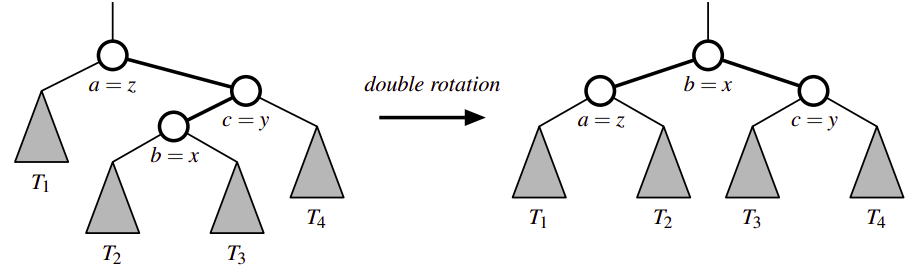

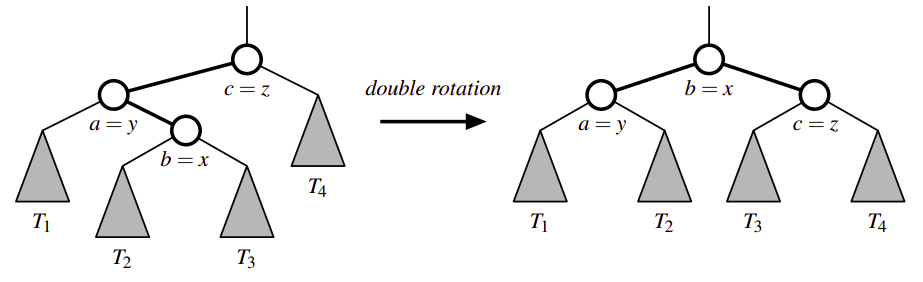

##What is the performance of AVL tree ?

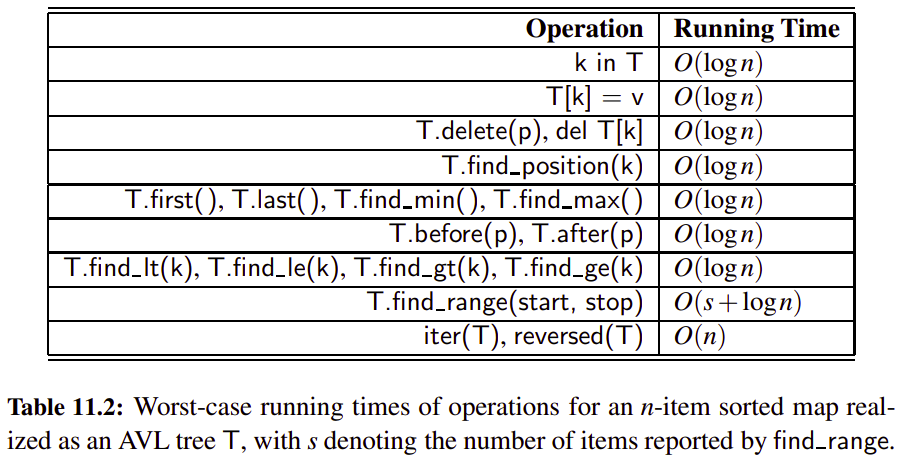